<a href="https://colab.research.google.com/github/wildanbash/PCVK/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

**Fungsi Convolution**

In [4]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  #height dan width dari kernel dan citra padding
  paddingheight, paddingwidth = image.shape
  kernelheight, kernelwidth = kernel.shape

  #menenteukan output
  outputheight = (paddingheight - kernelheight) // stride + 1
  outputwidth = (paddingwidth - kernelwidth) // stride + 1

  new_image = np.zeros((outputheight, outputwidth)).astype(np.float32)

  for y in range(0, outputheight):
    for x in range(0, outputwidth):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernelheight, x * stride:x * stride + kernelwidth] * kernel).astype(np.float32)
  return new_image

**Load Image and Change to Grayscale**

In [7]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

**Tentukan Kernel dan panggil fungsi Convolution**

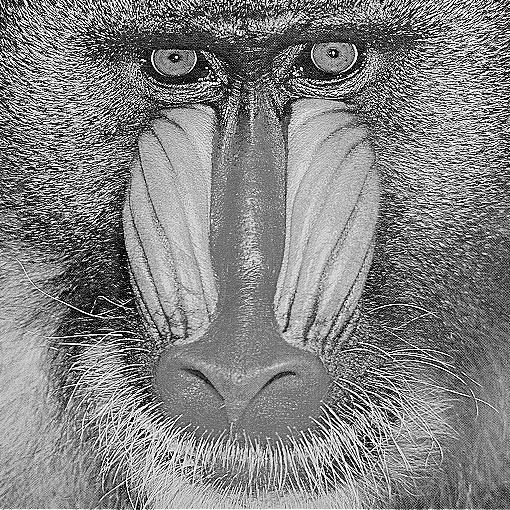

In [8]:
#SHARPEN

sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, sharpen,1,0))

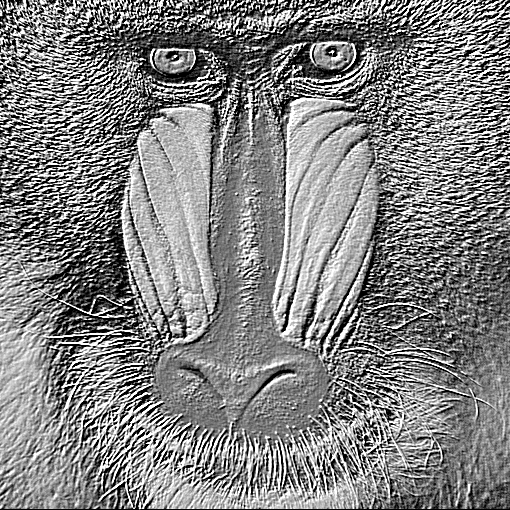

In [9]:
#EMBOSS

emboss = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, emboss,1,0))

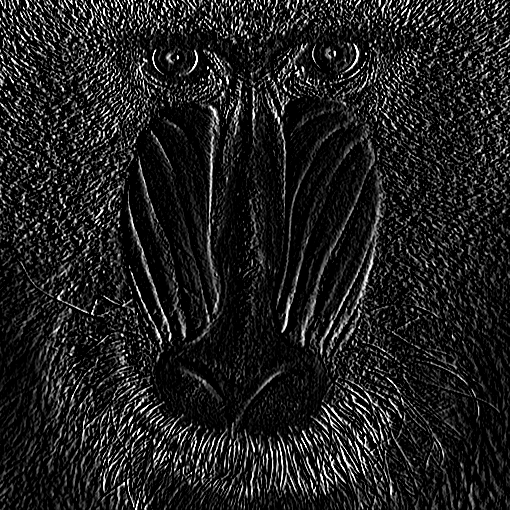

In [10]:
#Left Sobel Edge Detection

leftsobeledge = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, leftsobeledge,1,0))

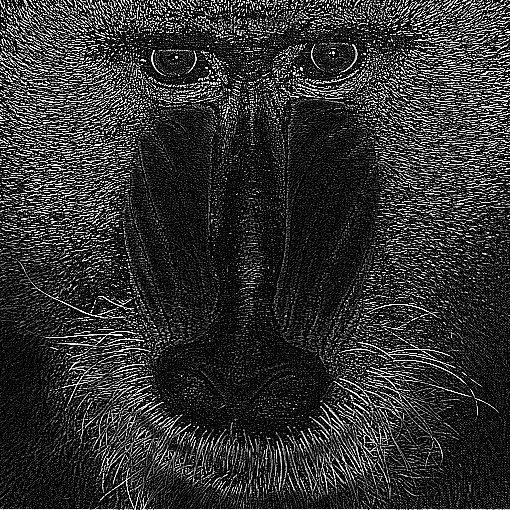

In [11]:
#Canny Edge Detection

cannyedge = np.array([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, cannyedge,1,0))

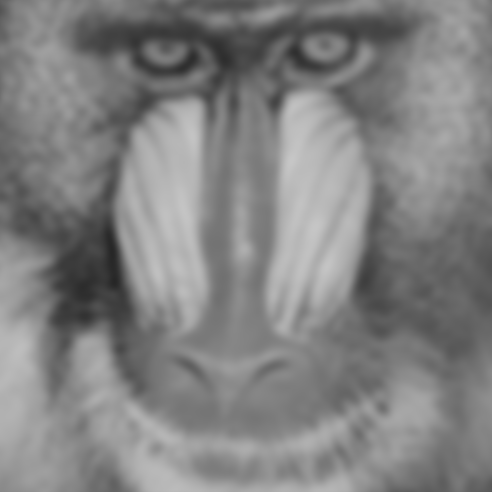

In [12]:
#21x21 Guassian Blur

kernel_size = 21
sigma=math.sqrt(kernel_size)
guassian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = guassian_kernel @guassian_kernel.transpose()
cv2_imshow(convolution2d(img_gray, gauss_kernel,1,0))